# Data Visualization - Seaborn


---
##Application on the Iris Dataset
**Objective:**

In this notebook, we will learn how we can create plots using the python Seaborn library.

##Dataset Description
- **sepal length (cm)**
- **sepal width (cm)** 	
- **petal length (cm)** 	
- **petal width (cm)** 	
- **target:**	Setosa (0), VersiColour (1), and Virginica (2)

# Load DATASET

In [49]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [50]:
iris = datasets.load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


# WORKING WITH SEABORN

On this notebook we are going to:
- Explain the functions provided by seaborn and show seaborn simplicity where different graphs can be plotted by changing only one parameter
- Give graphs that are not provided by matplotlib (eg density plot,heatmap)


### 1. Pairplot 
- Is a statistical plot to understand mixed data.
- It is a pairwise relationships in a dataset.
- The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

1.1 Basic Plot

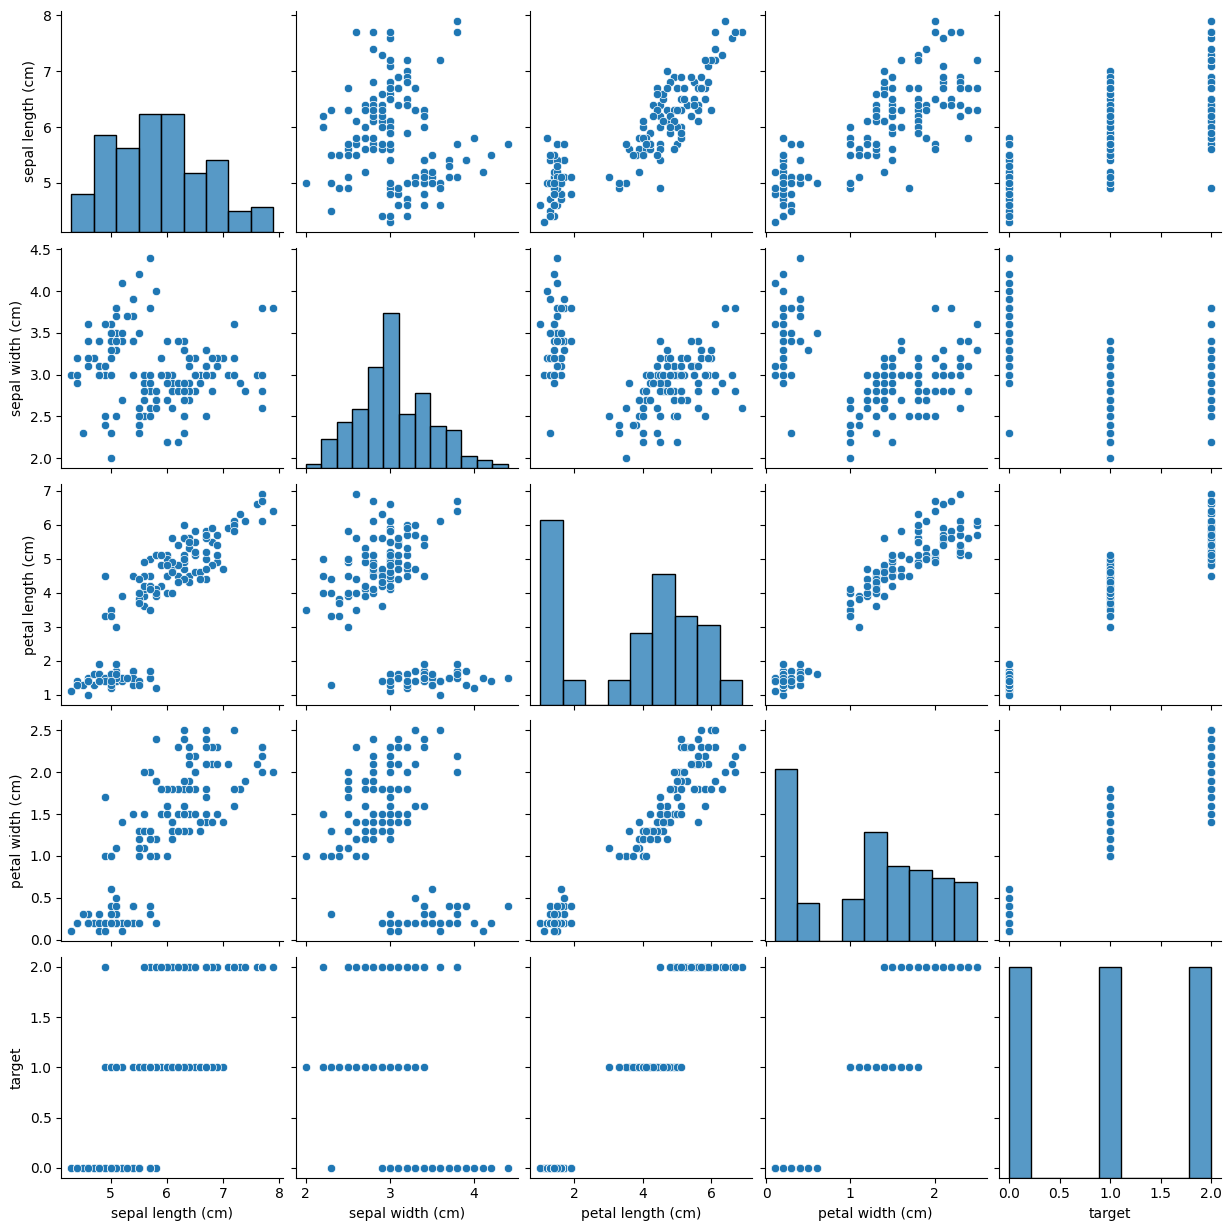

In [51]:
sns.pairplot(df)

The graph show 
1. histogram if on variable is understudy (diagonal subplot)
2. scatter plot (relationship) if two variable are understudy (non-diagonal subplot)

1.2 Cusomization Plot

We specify the kind of the diagonal plot that we want using the "diag-kind" parameter.

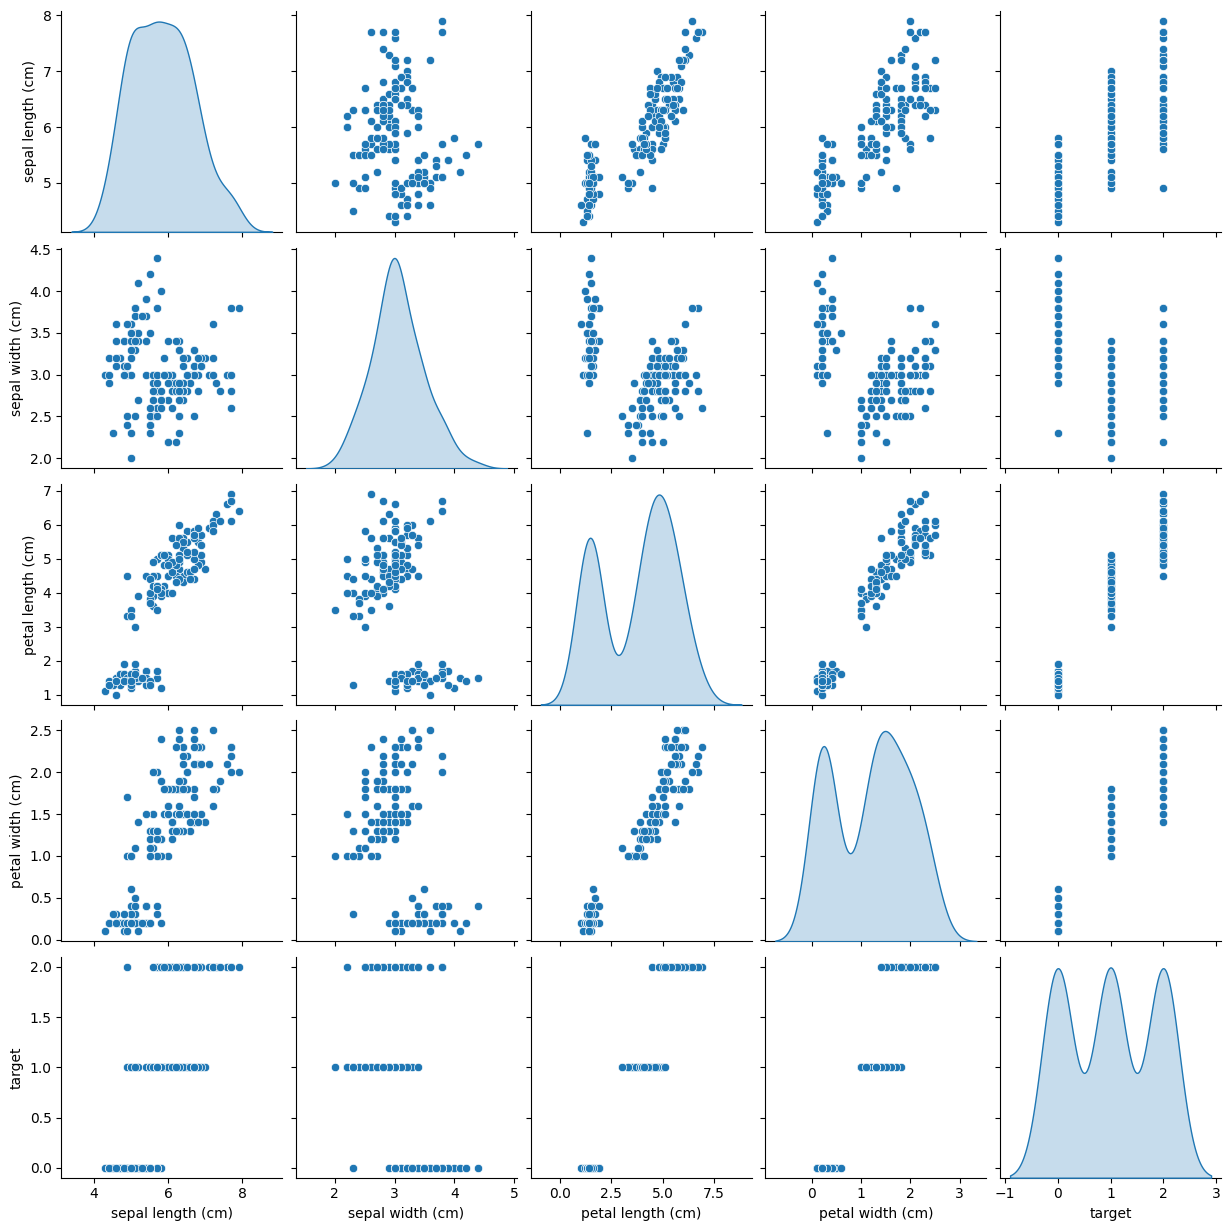

In [52]:
sns.pairplot(df, diag_kind='kde')

Now we want to visualize the same concept of the pair plot that we've seen, but with respect to different species (instead of visualizing with respect to the whole dataset), we just add the hue parameter to the pairplot function.

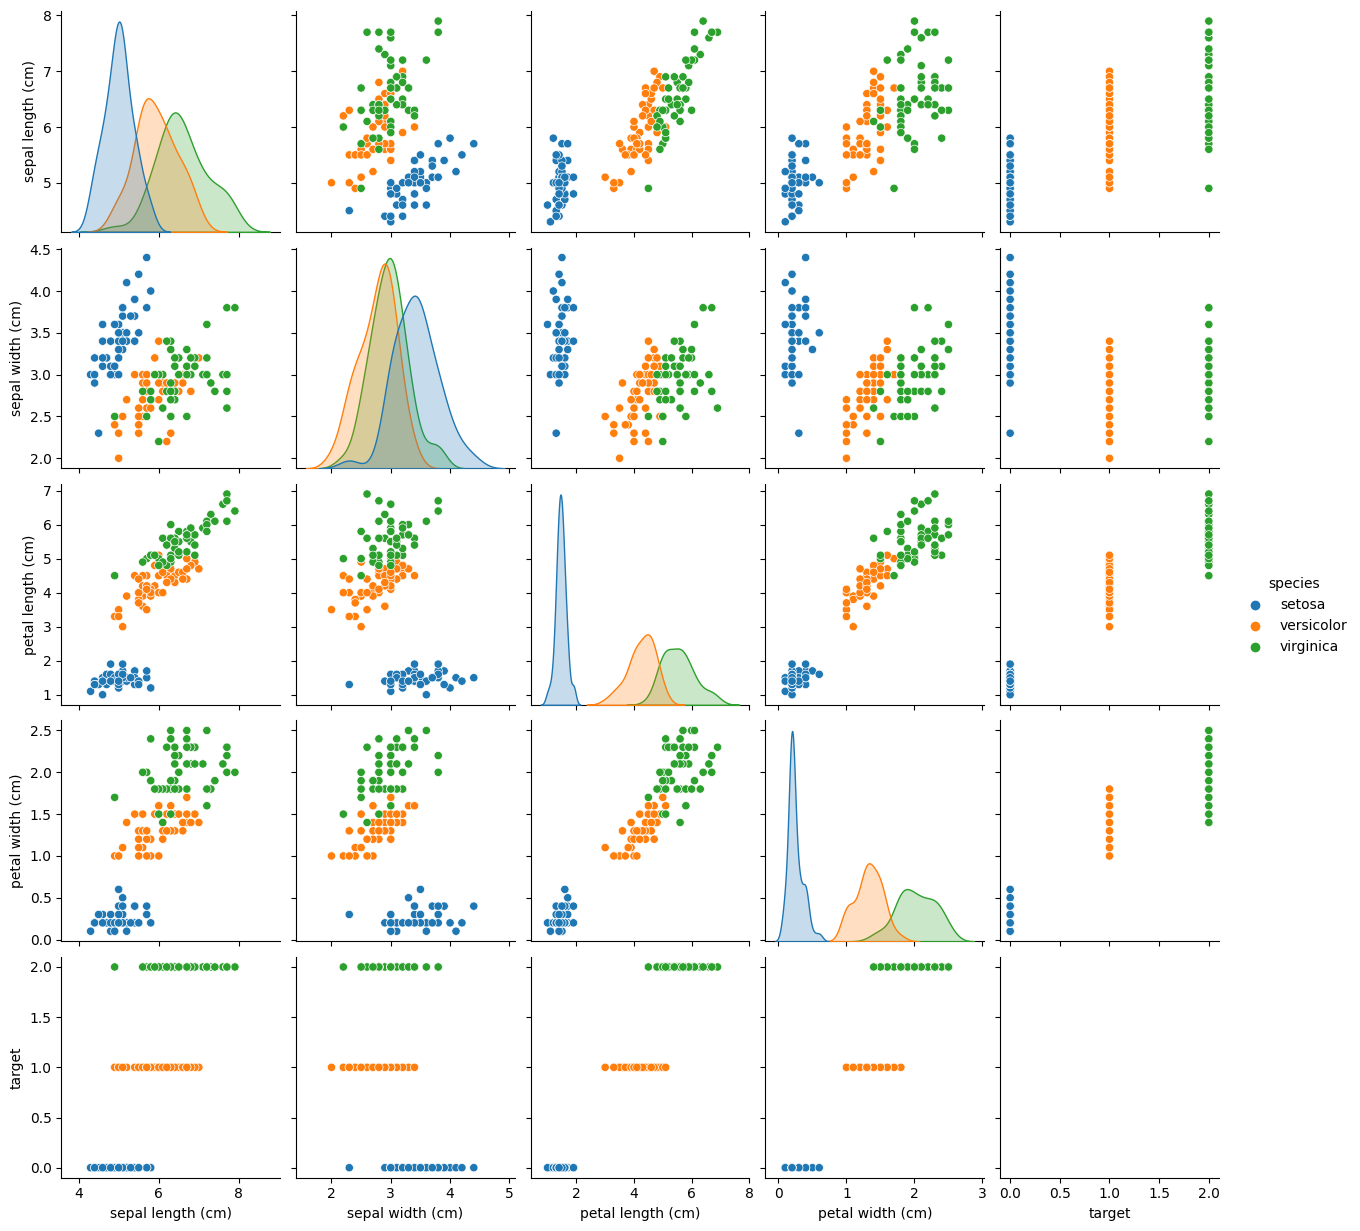

In [53]:
sns.pairplot(df, hue="species")

Now, the same concept as before but, we need to change the colors. This is why we use the "palette" parameter in the function

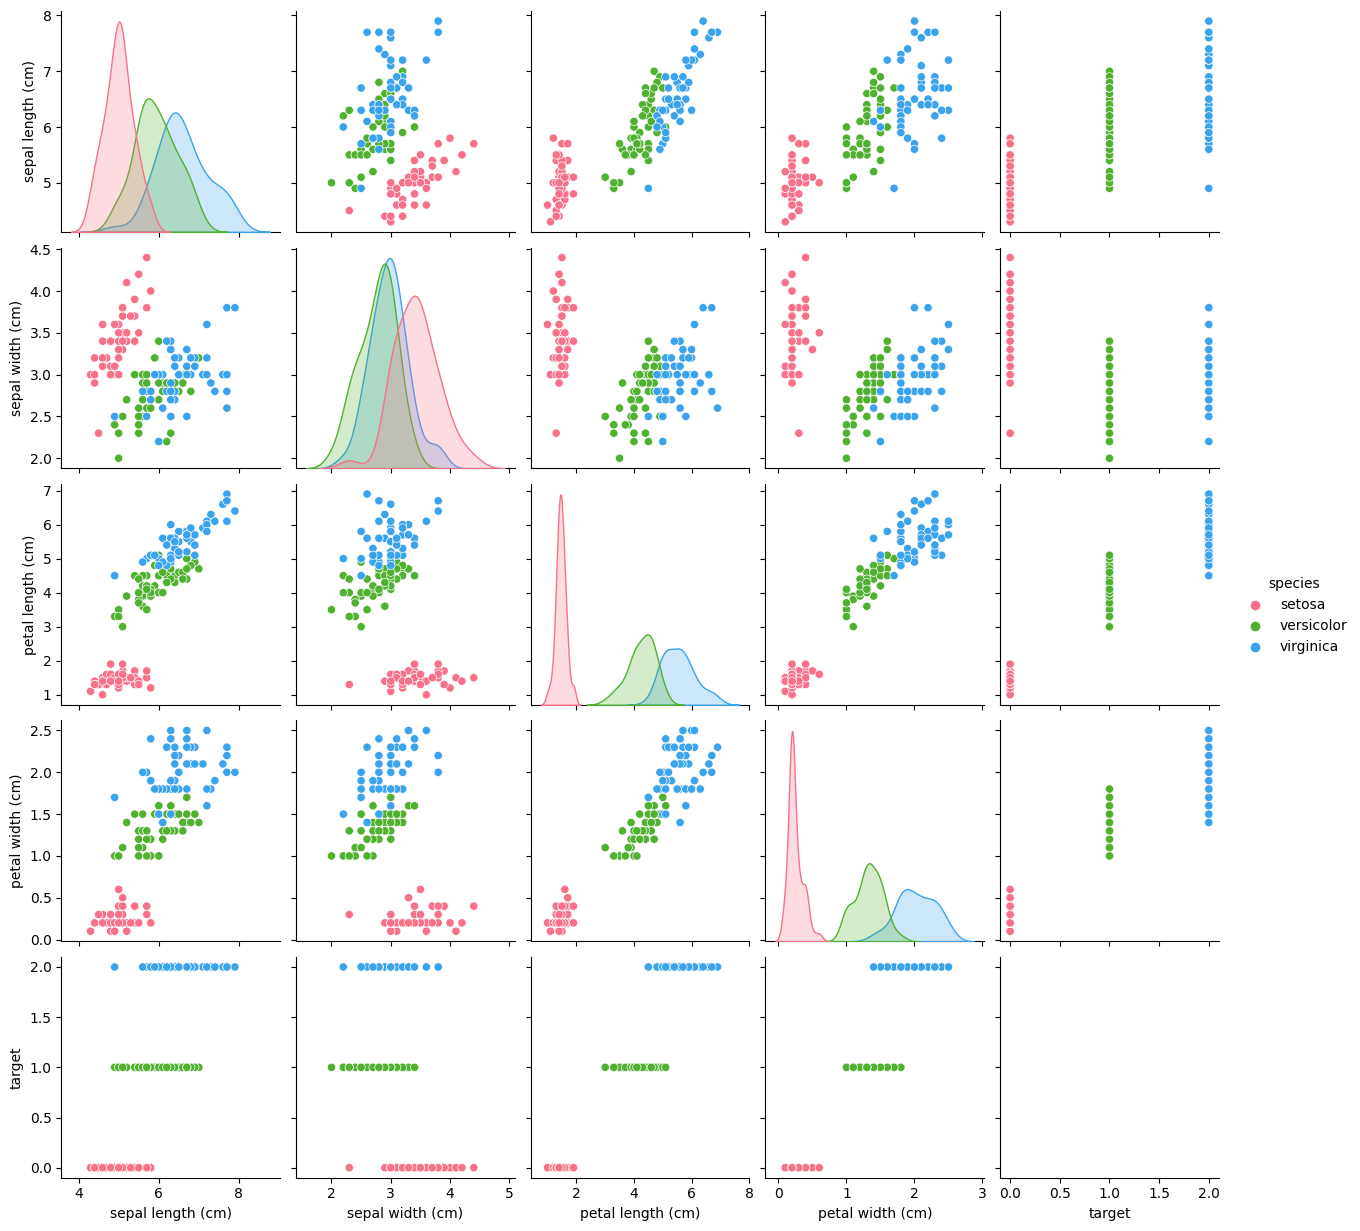

In [54]:
sns.pairplot(df, hue="species", palette="husl")

The "markers" parameter changes the way different species are represented.

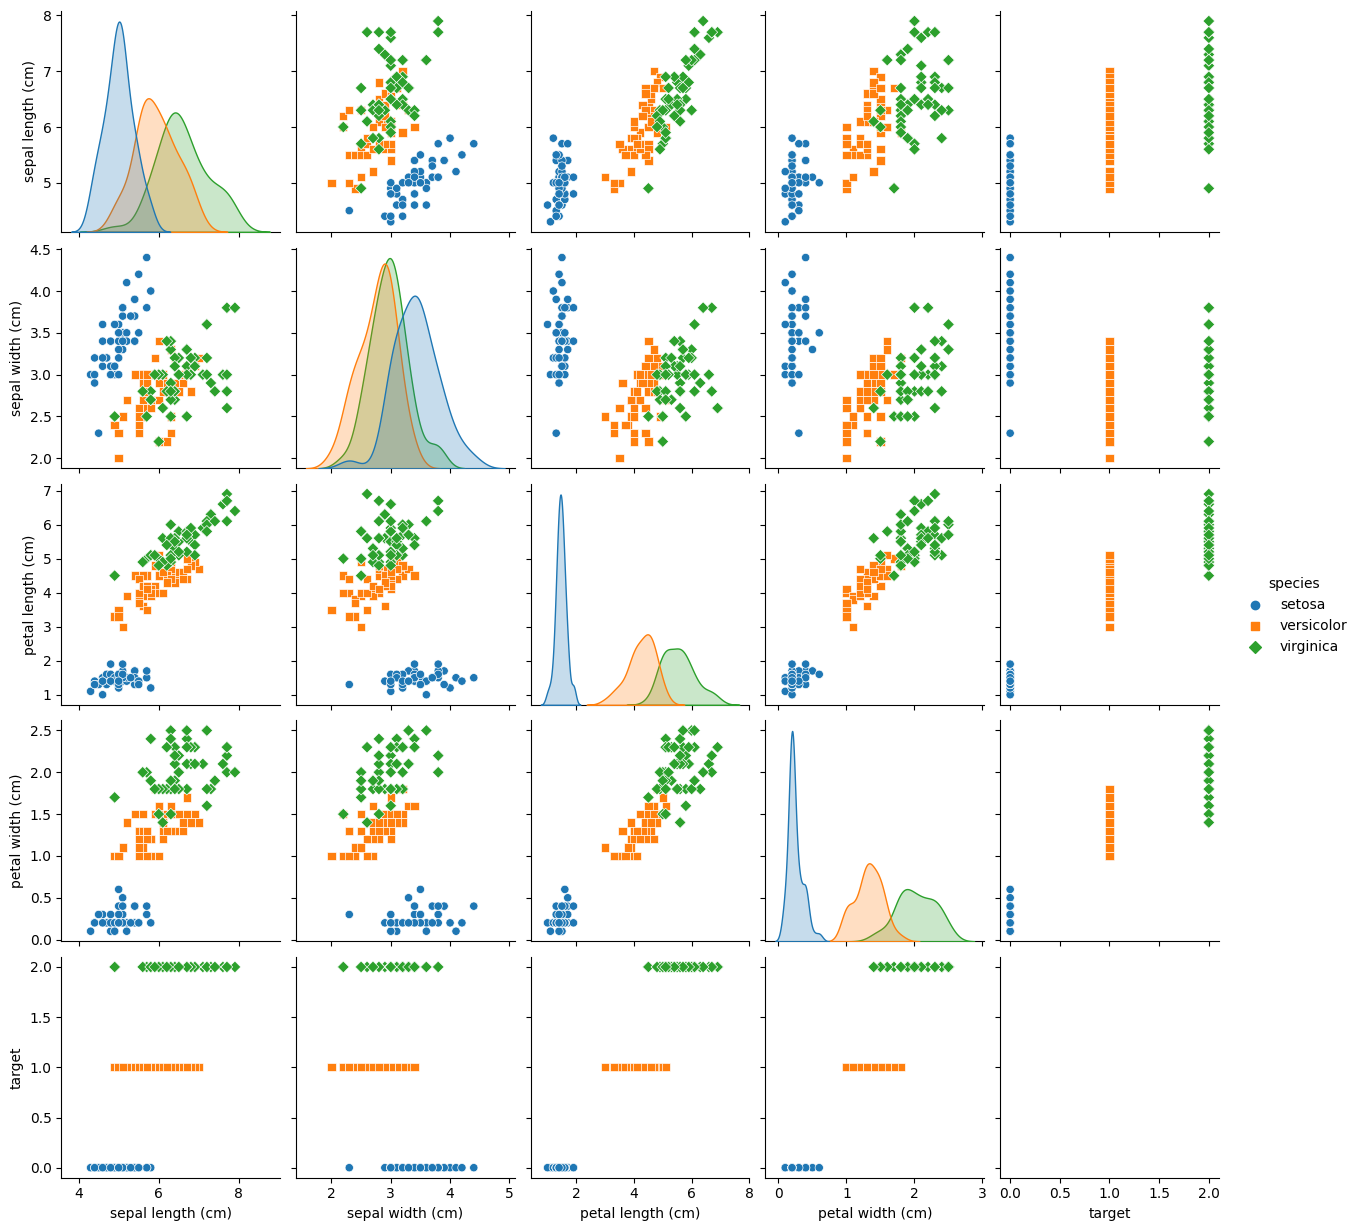

In [55]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])

We specify the kind of the plot we want to make by using the "kind" parameter.<br>
Here we visualize regression plots (trying to find the best line that fits the scatter points)

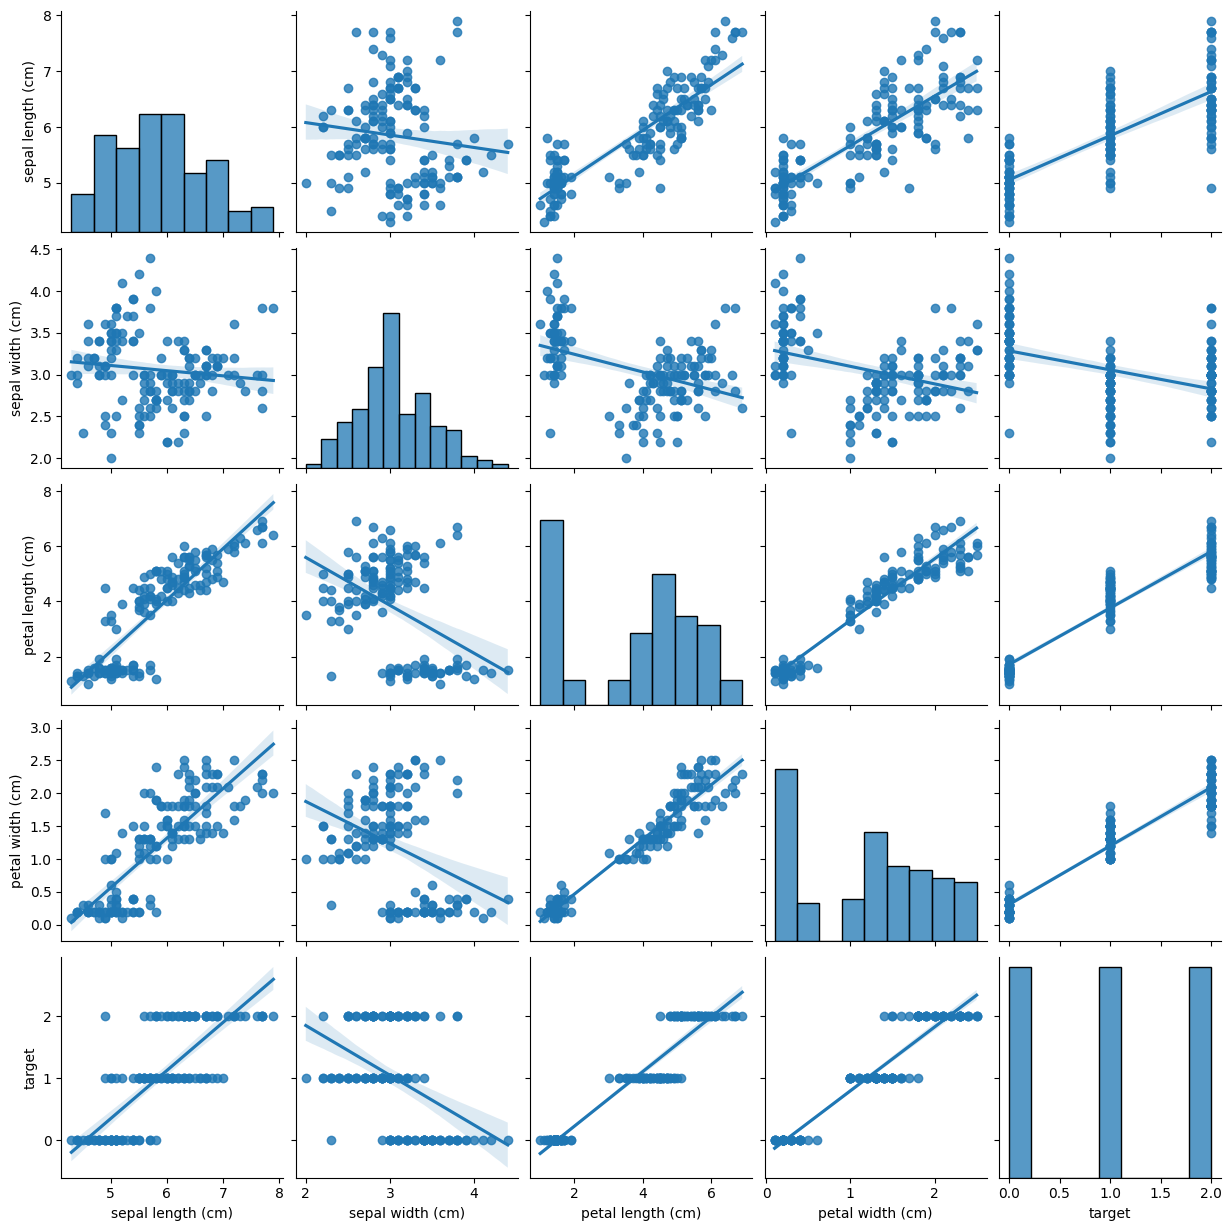

In [56]:
sns.pairplot(df, kind="reg")

**Recap:**
pairplot parameters
- diag_kind Kind of plot for the diagonal subplots. The default depends on whether "hue" is used or not.
- kind Kind of plot for the non-identity relationships.
- palette Set of colors for mapping the hue variable. If a dict, keys should be values in the hue variable.
- hue Variable in data to map plot aspects to different colors.

### 2. Heatmap 
- Is a graphical representation of data where the individual values contained in a matrix are represented as colors.
- It is really useful to display a general view of numerical data.


2.1 Basic Plot

<Axes: >

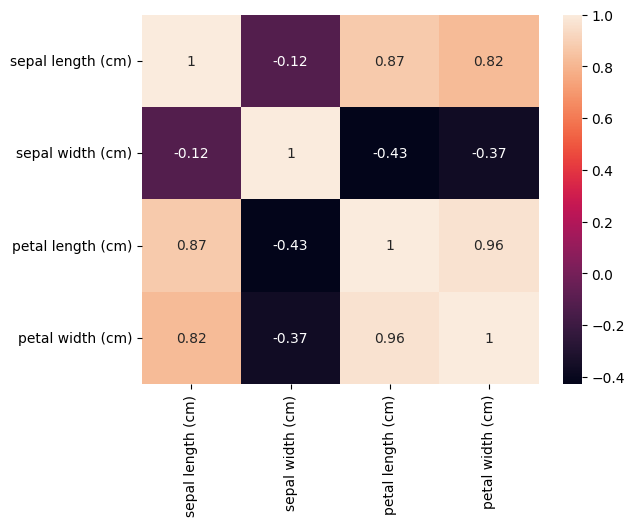

In [57]:
corr_df = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr(method = "pearson")
sns.heatmap(corr_df,annot=True)

-The heatmap shows print pearson correlation between predicators.
-Pearson correlation is a mathematical measure of strictly LINEAR correlation between two attributes.The closer it is to 1 or -1, the stronger the linear relation. The closer it is to 0, the weaker the relation.

As we can see:
- we get 0.96 between petal width & petal length: this means that we have a postive relationship between these 2 variables.
- we get 0.87 between sepal length & petal length: this means that we have a psotive relationship between these 2 variables.
- we get 0.82 between sepal length & petal width: this means that we have a psotive relationship between these 2 variables.
- we get -0.11  between sepal length & sepal width: this means that there is no correlation between these 2 variables.
- we get 0.42  between sepal width & petal length: this means that there is no correlation between these 2 variables.
- we get 0.36  between sepal width & petal width: this means that there is no correlation between these 2 variables.


2.2 Customization Plot

We can add borders to our heat map with th ehelp of "linecolor" & "linewidths" parameters

<Axes: >

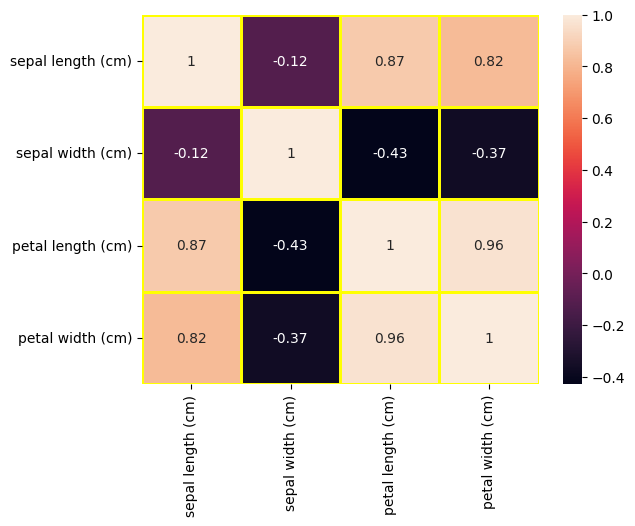

In [58]:
sns.heatmap(corr_df,annot=True,linewidths=2, linecolor='yellow')

We change the colormap by using the "cmap" parameter.

<Axes: >

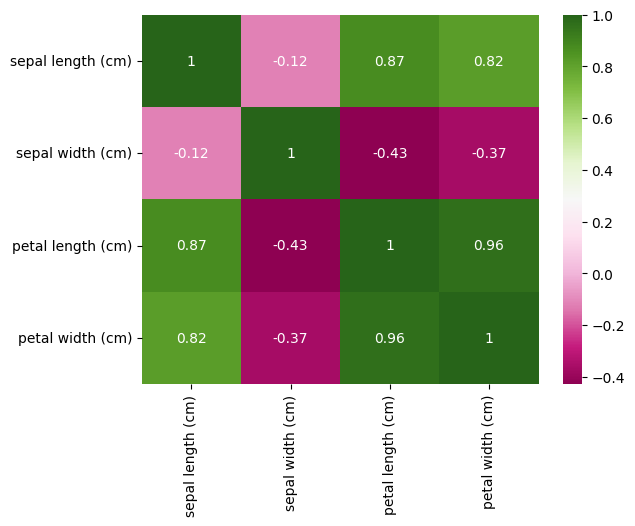

In [59]:
sns.heatmap(corr_df,annot=True,cmap="PiYG")

### 3. Density plot 
- Shows the distribution of a numerical variable.
- It takes only set of numeric values as input.
- It is really close to a histogram
- An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used (each bar used in a typical histogram)

3.1 Basic Plot

<Axes: xlabel='sepal width (cm)', ylabel='Density'>

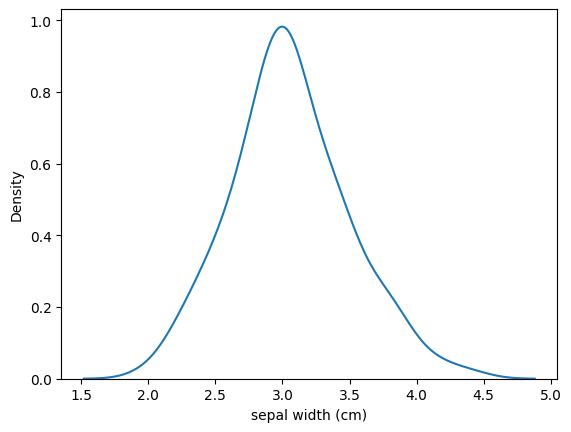

In [60]:
sns.kdeplot(df['sepal width (cm)'])

The peaks of a Density Plot help display where values are concentrated over the interval.
- we can see that values are concentrated at 3.0 of sepal width

<Axes: xlabel='sepal length (cm)', ylabel='Density'>

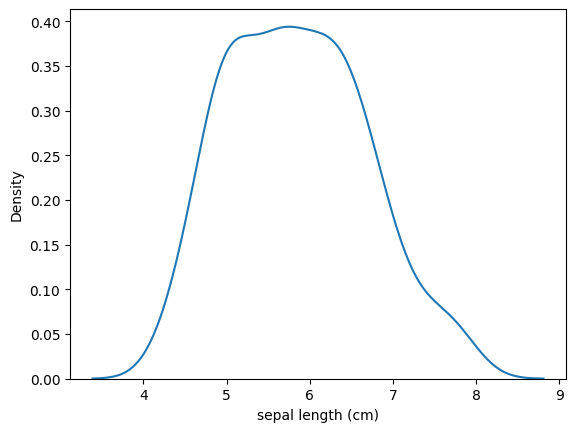

In [61]:
sns.kdeplot(df['sepal length (cm)'])

- we can see that values are concentrated in range (5,7) of sepal length

<Axes: xlabel='petal width (cm)', ylabel='Density'>

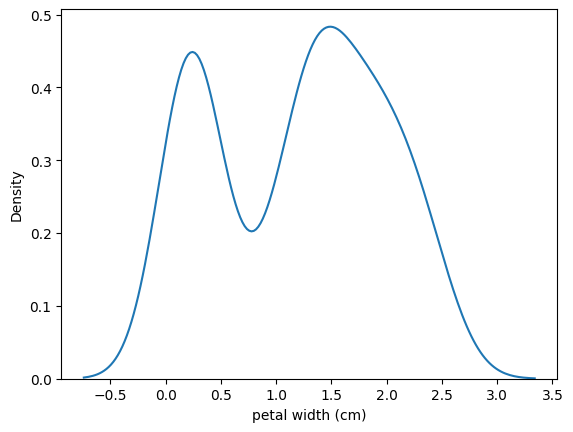

In [62]:
sns.kdeplot(df['petal width (cm)'])

- we can see that values are concentrated at 0.2 and 1.6 of petal width

<Axes: xlabel='petal length (cm)', ylabel='Density'>

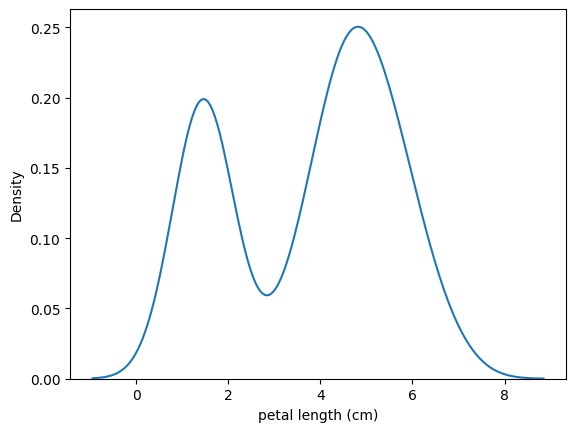

In [63]:
sns.kdeplot(df['petal length (cm)'])

- we can see that values are concentrated at 1.5 and 5.2 of petal length

3.2 Customization Plot

We add a shading to the plot using the parameter "shade"

<ipython-input-64-f3ad2e5e5b72>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sepal width (cm)'],shade=True)


<Axes: xlabel='sepal width (cm)', ylabel='Density'>

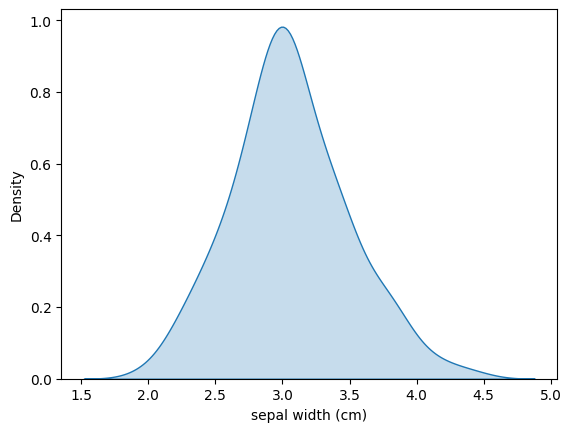

In [64]:
sns.kdeplot(df['sepal width (cm)'],shade=True)

We can change the color of the plot as well as its orientation using respectively "color" and "vertical" parameters.

<ipython-input-65-a6b2017ee769>:1: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df['sepal width (cm)'],shade=True,vertical=True, color="skyblue")
<ipython-input-65-a6b2017ee769>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sepal width (cm)'],shade=True,vertical=True, color="skyblue")


<Axes: xlabel='Density', ylabel='sepal width (cm)'>

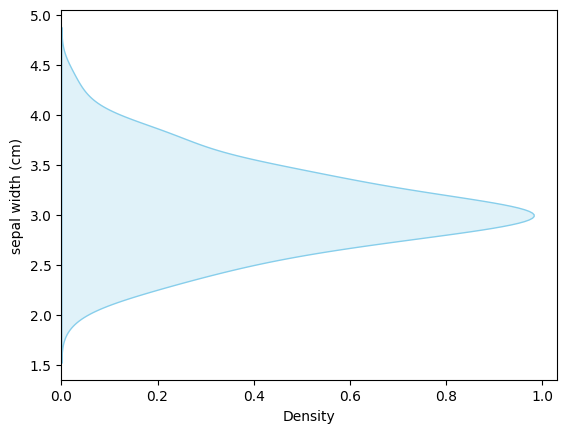

In [65]:
sns.kdeplot(df['sepal width (cm)'],shade=True,vertical=True, color="skyblue")

We can have several plots on the same figure by saving the result of each in the same variable. 

<ipython-input-66-117dfed9c277>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(df['sepal width (cm)'], shade=True, color="r")
<ipython-input-66-117dfed9c277>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(df['sepal length (cm)'], shade=True, color="b")


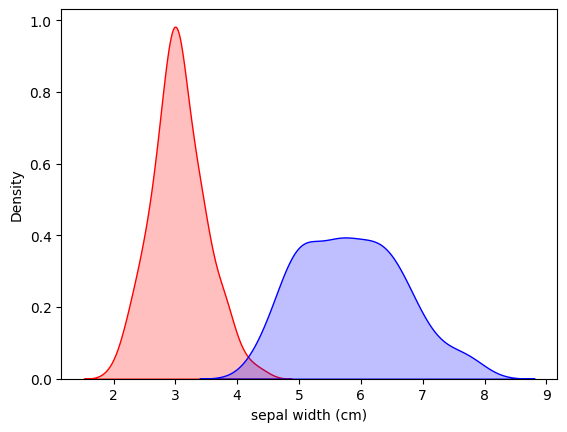

In [66]:
p1=sns.kdeplot(df['sepal width (cm)'], shade=True, color="r")
p1=sns.kdeplot(df['sepal length (cm)'], shade=True, color="b")


### 4. Bar plot 
- It shows the relationship between a numeric and a categoric variable. 
- Each entity of the categoric variable is represented as a bar. 
- The size of the bar represents its numeric value.

<Axes: xlabel='species', ylabel='sepal width (cm)'>

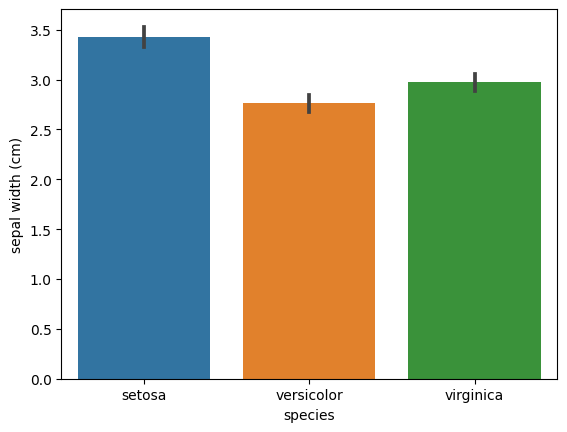

In [67]:
sns.barplot(x="species", y="sepal width (cm)", data=df)

this grah show the number of septal width per each species

<Axes: xlabel='species', ylabel='sepal length (cm)'>

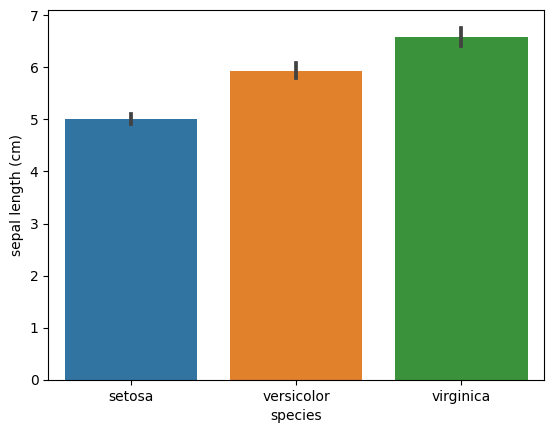

In [68]:
sns.barplot(x="species", y="sepal length (cm)", data=df)

this grah show the number of septal length per each species

<Axes: xlabel='species', ylabel='petal width (cm)'>

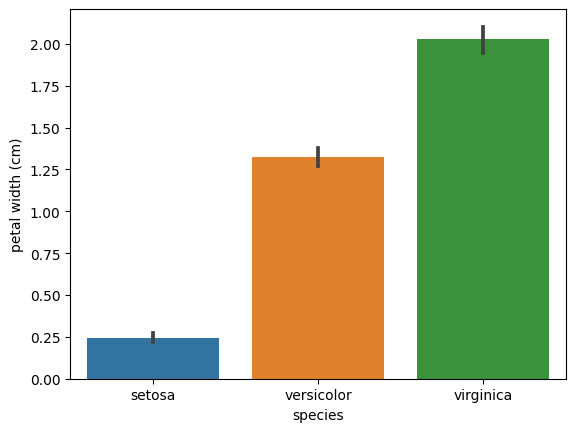

In [69]:
sns.barplot(x="species", y="petal width (cm)", data=df)

this grah show the number of petal width per each species

<Axes: xlabel='species', ylabel='petal length (cm)'>

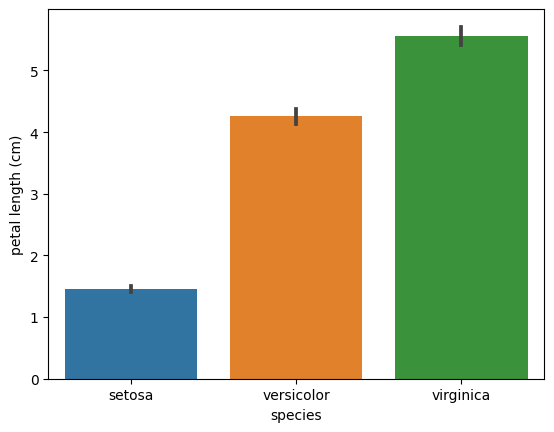

In [70]:
sns.barplot(x="species", y="petal length (cm)", data=df)

this grah show the number of petal length per each species

### 5. Catplot 

This function provides access to several axes-level functions that show the relationship between a numerical 
and one or more categorical variables using one of several visual representations. 
The kind parameter selects the underlying axes-level function to use:

5.1 Basic Plot

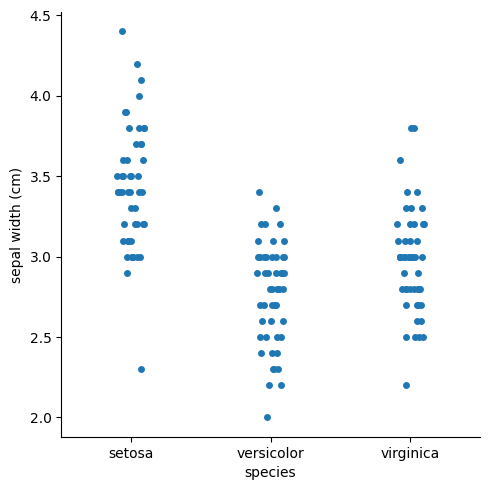

In [71]:
sns.catplot(x="species", y="sepal width (cm)", data=df);

we can see scatter plot of sepal width per each species

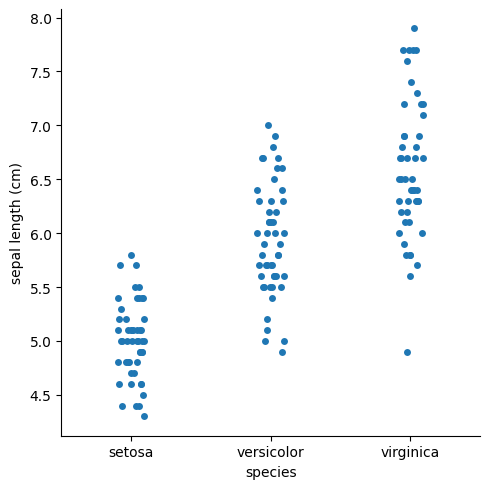

In [72]:
sns.catplot(x="species", y="sepal length (cm)", data=df);

we can see scatter plot of sepal length per each species

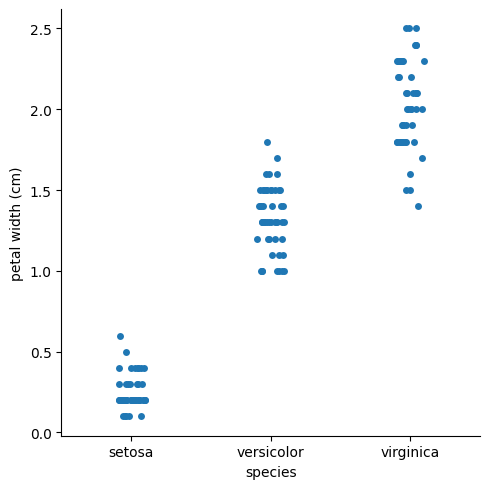

In [73]:
sns.catplot(x="species", y="petal width (cm)", data=df);

we can see scatter plot of petal width per each species

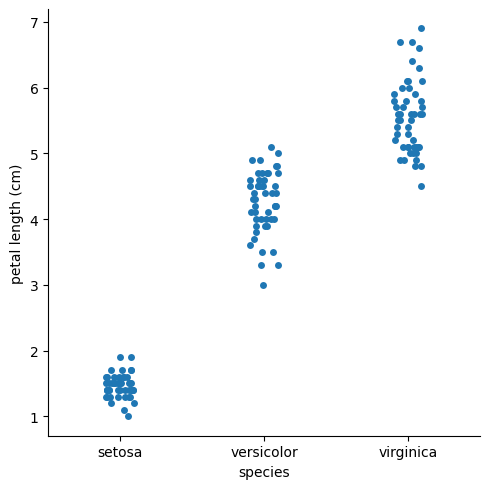

In [74]:
sns.catplot(x="species", y="petal length (cm)", data=df);

we can see scatter plot of petal length per each species

5.2 Customization Plot

We can simply change plot type using kind parameter

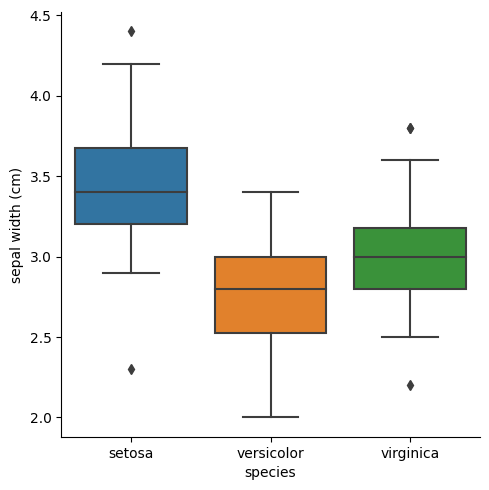

In [75]:
sns.catplot(x="species", y="sepal width (cm)", kind="box", data=df);

by setting kind='box' we can view the box plots for setal width column per each species

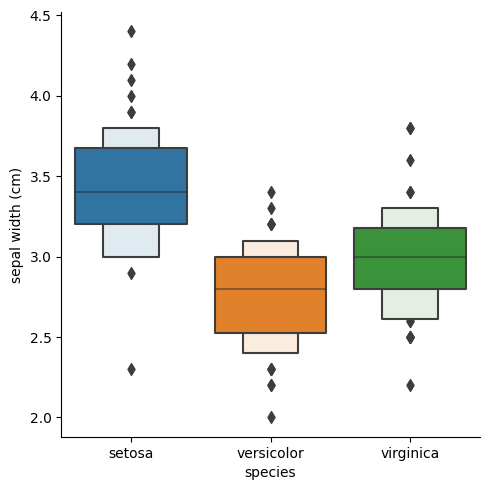

In [76]:
sns.catplot(x="species", y="sepal width (cm)", kind="boxen", data=df);

by setting kind='boxen' we can view the box plots for setal width column per each species

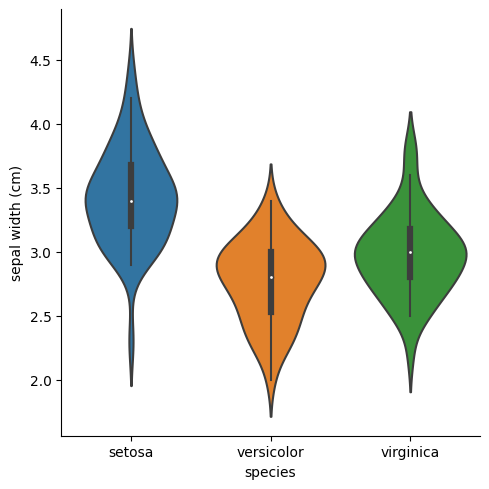

In [77]:
sns.catplot(x="species", y="sepal width (cm)", kind="violin", data=df);

by setting kind='violin' we can view the box plots for setal width column per each species

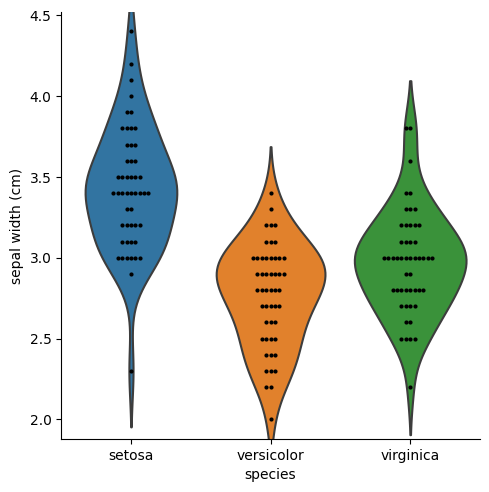

In [78]:
g = sns.catplot(x="species", y="sepal width (cm)", kind="violin", inner=None, data=df)
sns.swarmplot(x="species", y="sepal width (cm)", color="k", size=3, data=df, ax=g.ax);

we can plot two graph type using syntax above
- First the plot violine graph using  kind='violin', then we remove inner boxplot from violin using inner=None
- Second we plot on the same axis (ax) graph a swarmplot(dotted view)

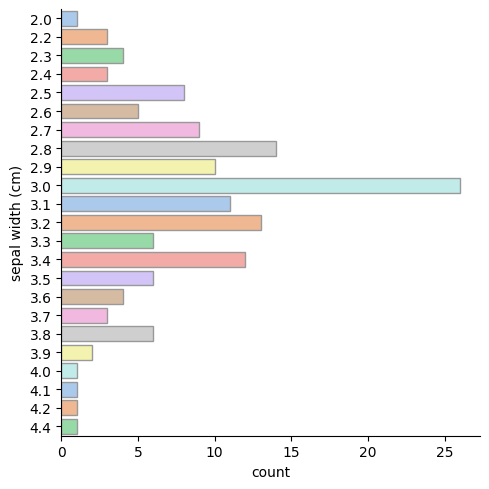

In [79]:
sns.catplot(y="sepal width (cm)", kind="count", palette="pastel", edgecolor=".6", data=df);

by setting kind to "count" we can view the count for each value occurred on sepal width

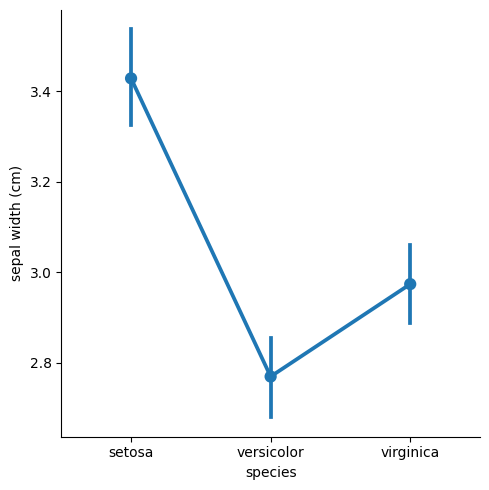

In [80]:
sns.catplot(x="species", y="sepal width (cm)", kind="point", data=df);

by setting the kind to 'point' we can see the average of the species distribution for the septal width data

### 6. Factor Plot
- Factor plots make it easy to separate plots by categorical classes.

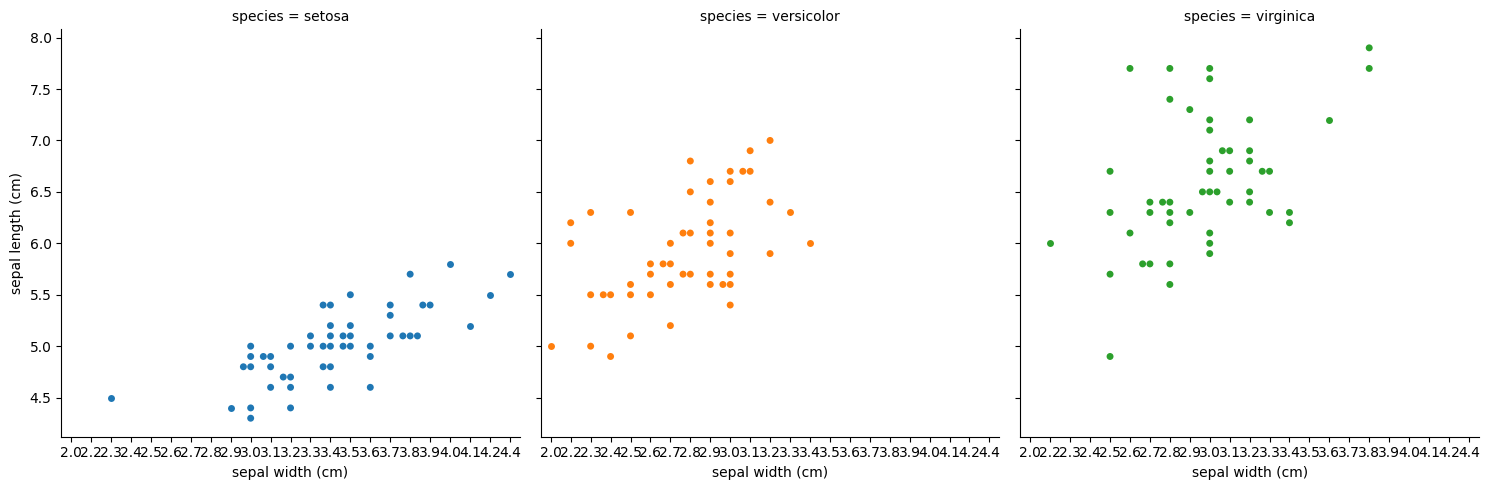

In [81]:
# Factor Plot
g = sns.catplot(x='sepal width (cm)', 
                   y='sepal length (cm)', 
                   data=df, 
                   hue='species',  # Color by stage
                   col='species',  # Separate by stage
                   kind='swarm') # Swarmplot

using factorplot we can view scatter plot (represent relationship) between sepal length and sepal width separater by species

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


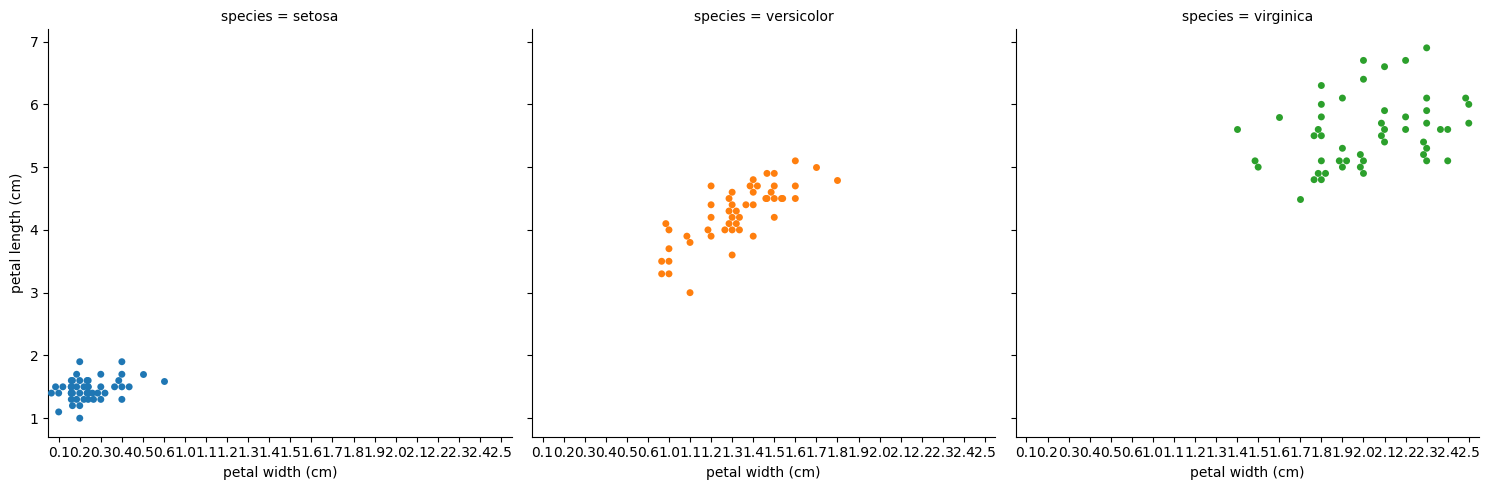

In [82]:
g = sns.catplot(x='petal width (cm)', 
                   y='petal length (cm)', 
                   data=df, 
                   hue='species',  # Color by stage
                   col='species',  # Separate by stage
                   kind='swarm') # Swarmplot

we can view scatter plot (represent relationship) between petal length and petal width separater by species

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


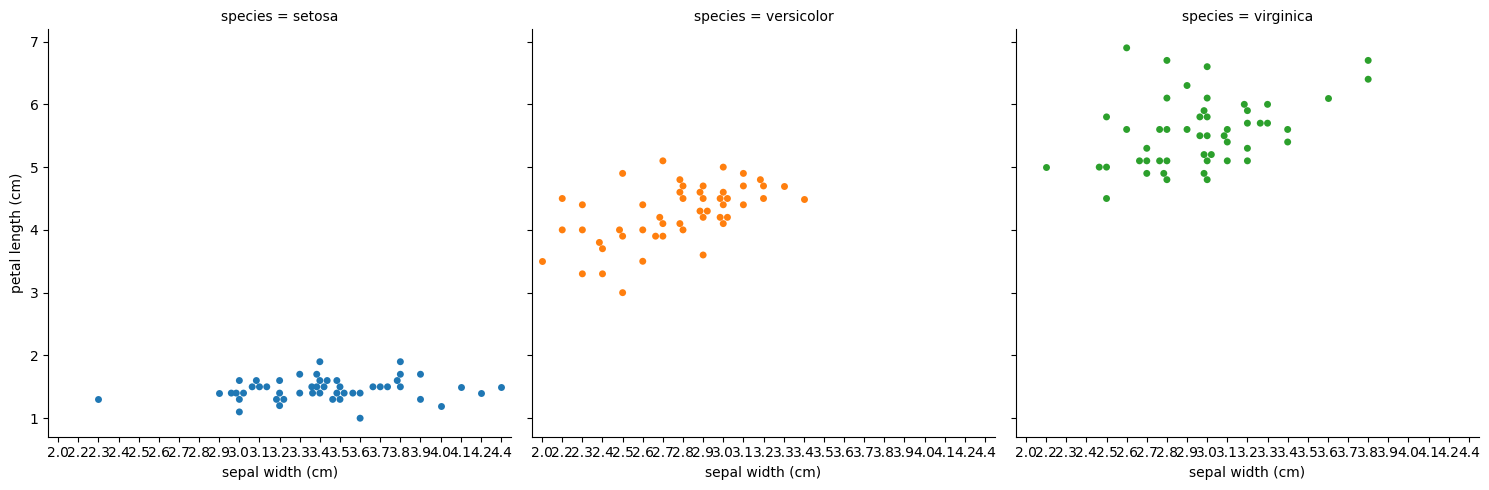

In [83]:
g = sns.catplot(x='sepal width (cm)', 
                   y='petal length (cm)', 
                   data=df, 
                   hue='species',  # Color by stage
                   col='species',  # Separate by stage
                   kind='swarm') # Swarmplot

we can view scatter plot (represent relationship) between petal length and sepal width separater by species

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


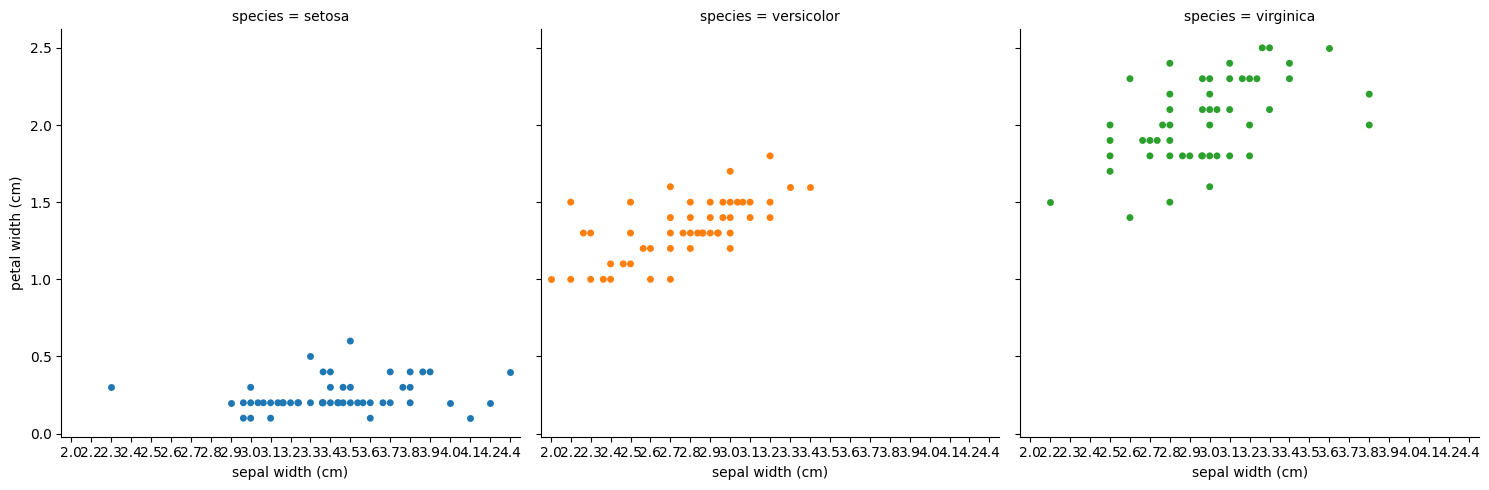

In [84]:
g = sns.catplot(x='sepal width (cm)', 
                   y='petal width (cm)', 
                   data=df, 
                   hue='species',  # Color by stage
                   col='species',  # Separate by stage
                   kind='swarm') # Swarmplot

we can view scatter plot (represent relationship) between petal width and sepal width separater by species

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.5% of the points cannot be placed; y

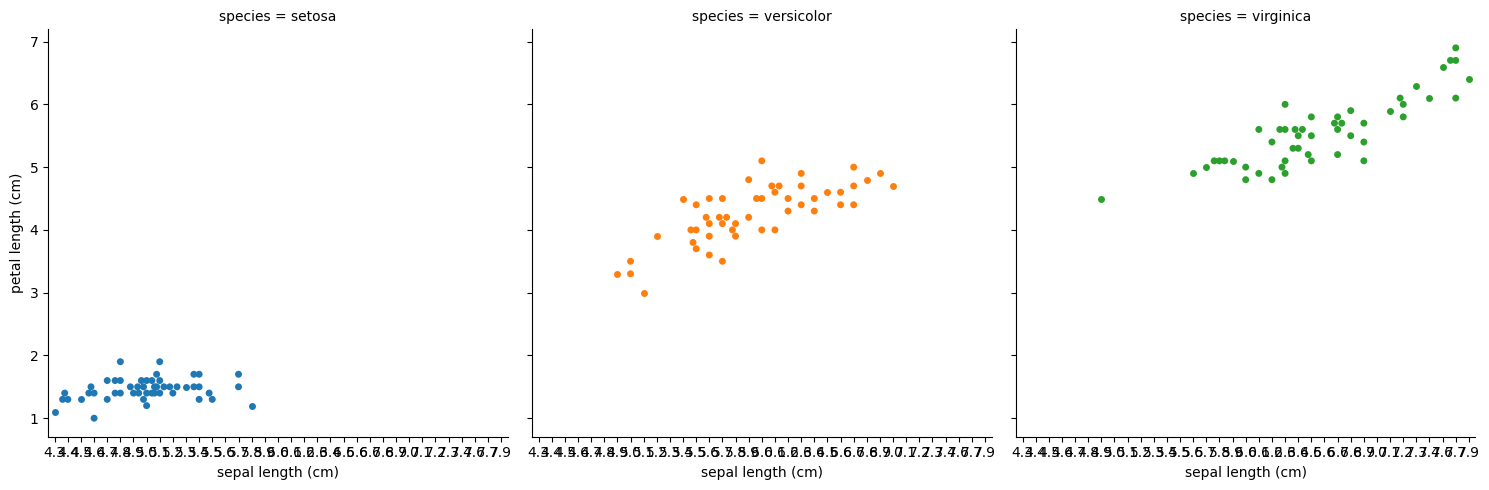

In [85]:
g = sns.catplot(x='sepal length (cm)', 
                   y='petal length (cm)', 
                   data=df, 
                   hue='species',  # Color by stage
                   col='species',  # Separate by stage
                   kind='swarm') # Swarmplot

we can view scatter plot (represent relationship) between petal length and sepal length separater by species

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; y

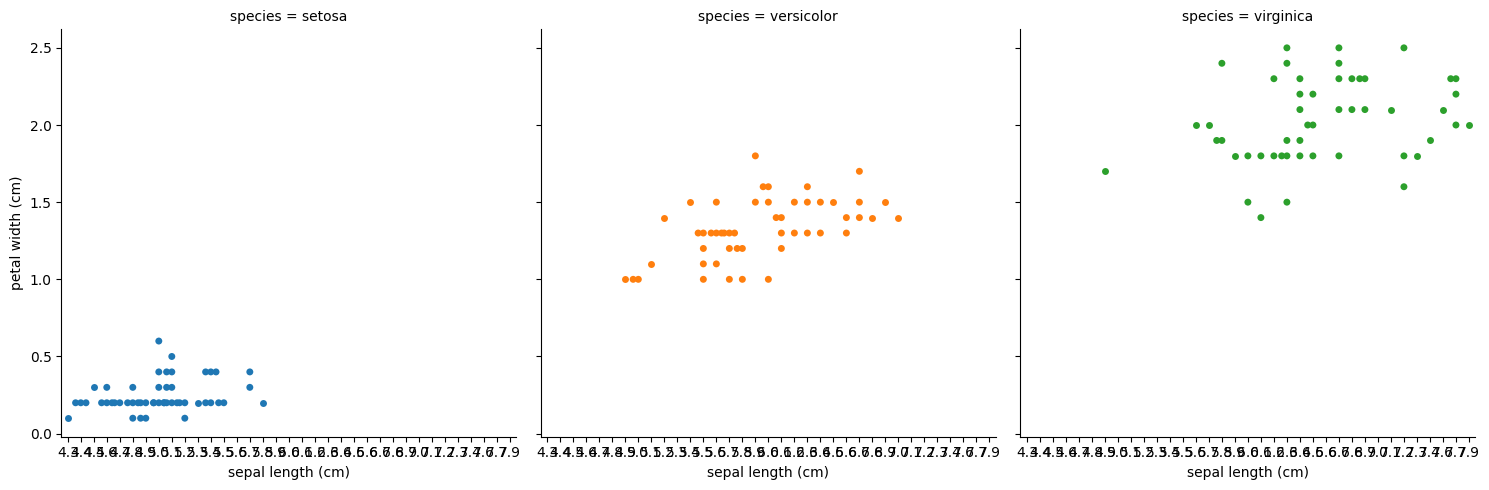

In [86]:
g = sns.catplot(x='sepal length (cm)', 
                   y='petal width (cm)', 
                   data=df, 
                   hue='species',  # Color by stage
                   col='species',  # Separate by stage
                   kind='swarm') # Swarmplot

we can view scatter plot (represent relationship) between petal width and sepal length separater by species

### 7. Joint Distribution Plot
- Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions

7.1. Basic Plot

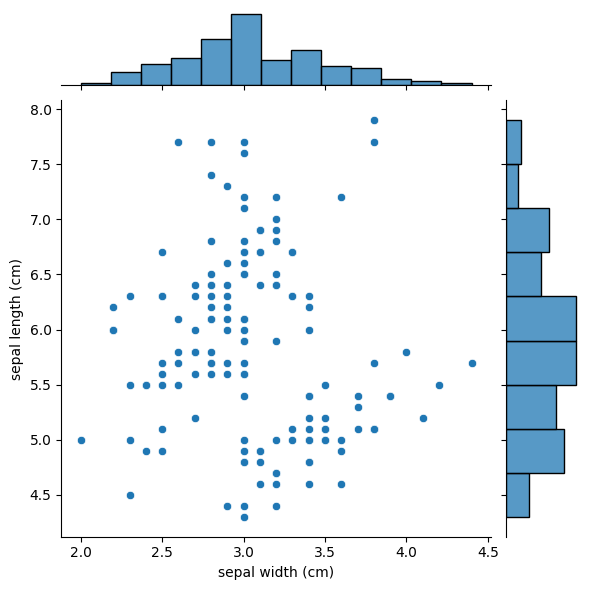

In [87]:
sns.jointplot(x='sepal width (cm)', y='sepal length (cm)', data=df)

This plot shows:
- scatter plot(represent relationship) between sepal length & sepal width
- histogram (represent distribution) for sepal length 
- histogram (represent distribution) for sepal width 

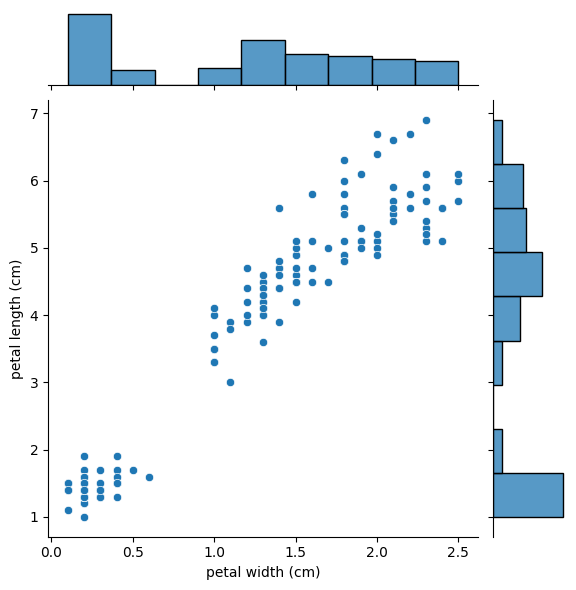

In [88]:
sns.jointplot(x='petal width (cm)', y='petal length (cm)', data=df)

This plot shows:
- scatter plot(represent relationship) between petal length & petal width
- histogram (represent distribution) for petal length 
- histogram (represent distribution) for petal width 

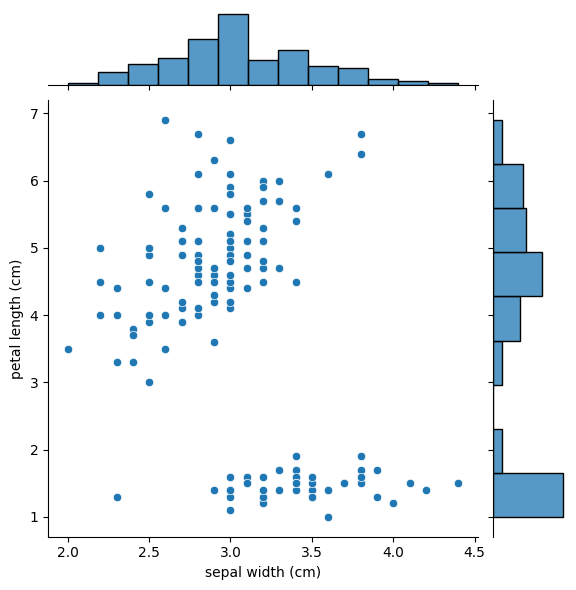

In [89]:
sns.jointplot(x='sepal width (cm)', y='petal length (cm)', data=df)

This plot shows:
- scatter plot(represent relationship) between petal length & sepal width
- histogram (represent distribution) for petal length 
- histogram (represent distribution) for sepal width 

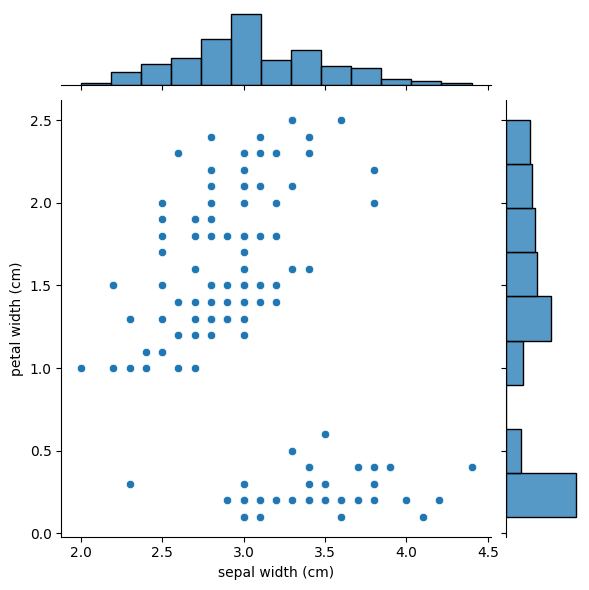

In [90]:
sns.jointplot(x='sepal width (cm)', y='petal width (cm)', data=df)

This plot shows:
- scatter plot(represent relationship) between petal width & sepal width
- histogram (represent distribution) for petal width 
- histogram (represent distribution) for sepal width 

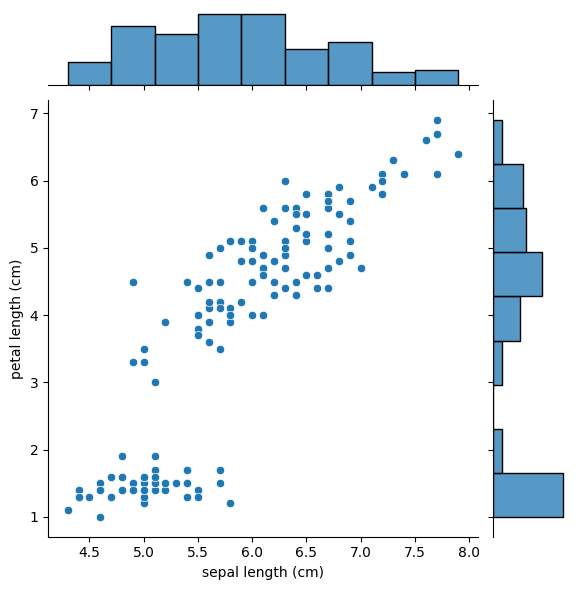

In [91]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=df)

This plot shows:
- scatter plot(represent relationship) between petal length & sepal length
- histogram (represent distribution) for petal length 
- histogram (represent distribution) for sepal length 

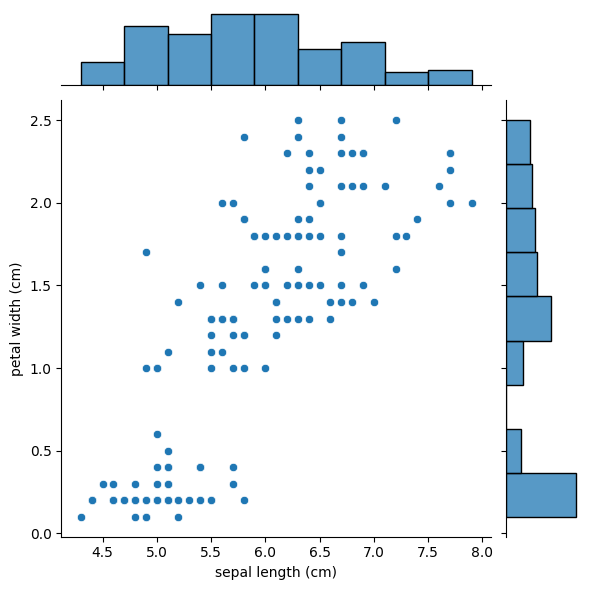

In [92]:
sns.jointplot(x='sepal length (cm)', y='petal width (cm)', data=df)

This plot shows:
- scatter plot(represent relationship) between petal width & sepal length
- histogram (represent distribution) for petal width 
- histogram (represent distribution) for sepal length 

7.1 Customization Plot

We can change the kind by using the "kind" parameter.

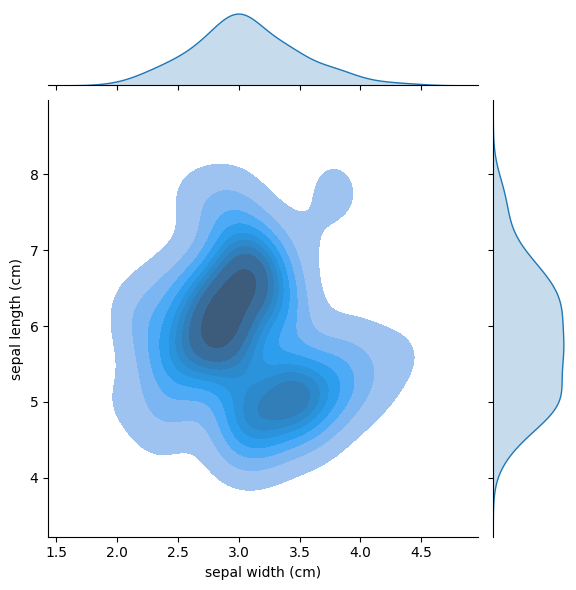

In [93]:
sns.jointplot(x='sepal width (cm)', y='sepal length (cm)',fill='True', kind='kde', data=df)

By setting the kind to 'kde' the plot shows:
- 2d density plot(represent relationship) between sepal width & sepal length
- density plot (represent distribution) for sepal width 
- density plot (represent distribution) for sepal length 

Note that the 2d density plot is a smoothed color density representation of the scatterplot, based on kernel density estimation. 
The goal of density estimation is to take a finite sample of data and to infer the underyling probability density function everywhere, including where no data point are presented. 
In kernel density estimation, the contribution of each data point is smoothed out from a single point into a region of vicinity. 
These smoothed density plot shows an average trend for the scatter plot.

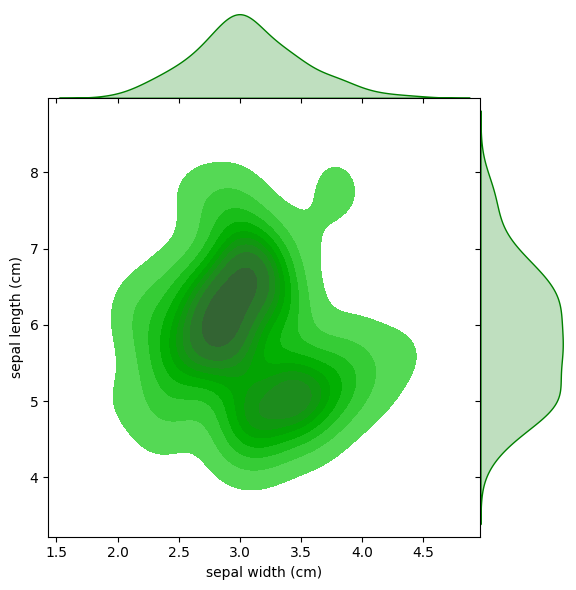

In [94]:
sns.jointplot(x='sepal width (cm)', y='sepal length (cm)',fill='True', kind='kde', space=0, color="g", data=df)

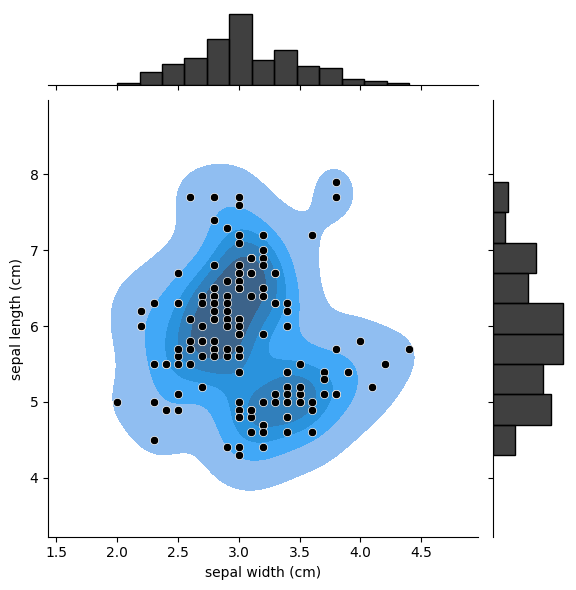

In [95]:
 (sns.jointplot(x="sepal width (cm)", y="sepal length (cm)",
                   data=df, color="k")
        .plot_joint(sns.kdeplot,fill='True', zorder=0, n_levels=6))


By adding `plot_joint(sns.kdeplot, zorder=0, n_levels=6))`, the plot will include the scatter plot that are find the kernal density estimation